In [318]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from statistics import *

# Training

Letter Recognition with Threshold Perceptron

1. Import the Dataset

In [319]:
pattern = np.loadtxt("pattern1.txt", dtype=int)

2. Set Variables

In [320]:
# number of input and output channels
nIn = 12*13
nOut = 26
# random initial weight matrix
wOut = np.random.rand(nOut,nIn) - 0.5

3. Train Vectors

In [321]:
# matrix of input pattern
rIn = np.reshape(np.transpose(pattern), (nIn, 26))
# matrix of desired outputs
rDes = np.identity(26)

4. Update and Train Vectors

In [322]:
# error array
error = []
for training_step in range(20):
  # test all pattern
  # threshold activation function
  rOut = np.matmul(wOut,rIn)>0
  dist = sum(sum(abs(rDes - rOut)))/26
  error.append(dist)
  # training with delta rule
  wOut = wOut + 0.1*np.matmul((rDes-rOut),np.transpose(rIn))

5. Plot the Results

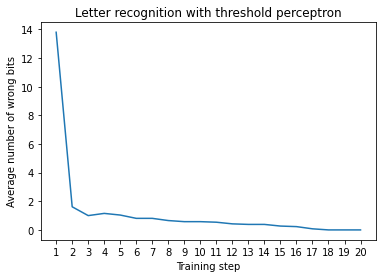

In [323]:
plt.plot(range(1,21),error)
plt.xlabel('Training step')
plt.ylabel('Average number of wrong bits')
plt.title("Letter recognition with threshold perceptron")
plt.xticks(range(1,21))
plt.show()

# Testing

Testing Generalization of Performance of Trained Perceptron

1. Import Dataset

In [324]:
letterMatrix = rIn

2. Define randomFlipMatrix Function

In [325]:
def randomFlipMatrix(n):
  r = np.zeros((156,26))
  for i in range(26):
    x = np.random.permutation(156)
    r[x[1:n],i] = 1
  return r

3. Flip random bits and test the perceptron

In [326]:
meanDist1=[]
meanDist2=[]
stdDist1=[]
stdDist2=[]
for nflip in range(80):
  dist1 = []
  dist2 = []
  for trial in range(10):
    rIn = abs(letterMatrix - randomFlipMatrix(nflip))
    # Threshold output Function
    rOut1 = np.matmul(wOut,rIn)>0
    nerror = 0
    for j in range(26):
      nerror = nerror + (sum(rDes[:,j]!=rOut1[:,j])>0)
    dist1.append(int(nerror))
    # max output function
    A = np.matmul(wOut,rIn)
    [v,i] = A.max(axis=1),A.argmax(axis=1)
    rOut2 = np.zeros((26,26))
    for j in range(26):
      rOut2[i[j],j]=1
    dist2.append(0.5*sum(sum(rDes!=rOut2)))
  meanDist1.append(mean(dist1))
  meanDist2.append(mean(dist2))
  stdDist1.append(stdev(dist1))
  stdDist2.append(stdev(dist2))

4. Plot the results

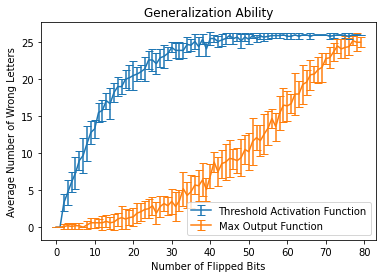

In [327]:
plt.errorbar(range(80),meanDist1,yerr=stdDist1,capsize=4,label="Threshold Activation Function")
plt.errorbar(range(80),meanDist2,yerr=stdDist2,capsize=4,label="Max Output Function")

plt.title("Generalization Ability")
plt.xlabel("Number of Flipped Bits")
plt.ylabel("Average Number of Wrong Letters")
plt.legend()
plt.show()